In [2]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection

2022-11-30 21:10:24.555800: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-30 21:10:26.320506: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-30 21:10:26.320617: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-11-30 21:10:26.320625: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [3]:
path = Path("transformed_to_888")
with open(path/'data.npy', 'rb') as d, open(path/"labels.npy", "rb") as l, open(path/"classes.npy", "rb") as c:
    data = np.load(d)
    labels = np.load(l)
    classes = np.load(c)
le = LabelEncoder()
le.classes_ = classes

In [4]:
print(labels.shape)
print(data.shape)
print(classes)

(1642,)
(1642, 240, 320, 3)
['Angelina Jolie' 'Brad Pitt' 'Denzel Washington' 'Hugh Jackman'
 'Jennifer Lawrence' 'Johnny Depp' 'Kate Winslet' 'Leonardo DiCaprio'
 'Megan Fox' 'Natalie Portman' 'Nicole Kidman' 'Robert Downey Jr'
 'Sandra Bullock' 'Scarlett Johansson' 'Tom Cruise' 'Tom Hanks'
 'Will Smith']


In [5]:
from collections import Counter
print(Counter(labels))

Counter({13: 184, 7: 97, 3: 96, 4: 96, 11: 95, 9: 95, 2: 94, 10: 92, 8: 92, 6: 91, 15: 90, 14: 89, 12: 89, 0: 89, 5: 86, 1: 84, 16: 83})


In [6]:
train_data, validation_data, train_labels, validation_labels= model_selection.train_test_split(data,labels, random_state=42,test_size=0.2)

print('train data shape:',np.shape(train_data))
print('validation data shape:',np.shape(validation_data))
print('train labels shape:',np.shape(train_labels))
print('validation labels shape:',np.shape(validation_labels))

train data shape: (1313, 240, 320, 3)
validation data shape: (329, 240, 320, 3)
train labels shape: (1313,)
validation labels shape: (329,)


In [7]:
mean = np.mean(train_data, axis = 0)
std = np.std(train_data, axis = 0)

train_data = (train_data-mean) / std
validation_data = (validation_data-mean) / std

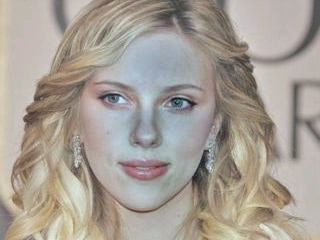

In [8]:
keras.utils.array_to_img(train_data[0])

In [9]:
classes = len(le.classes_)
classes

17

In [10]:
import gc
gc.collect() # used to clear gpu memory (in theory lol)

0

In [11]:
model = keras.models.Sequential([
    keras.layers.Input(shape=train_data.shape[1:]),
    keras.layers.MaxPool2D((2,2), input_shape=train_data.shape[1:]),
    keras.layers.Conv2D(8, (3,3), activation="relu"),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.5),
    keras.layers.Conv2D(16, (3,3), activation="relu"),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(32, (3,3), activation="relu"),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation="relu"),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(128, (3,3), activation="relu"),
    keras.layers.MaxPool2D((2,2)),
    #keras.layers.Conv2D(256, (3,3), activation="relu"),
    #keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(70, activation="relu"),
    keras.layers.Flatten(),
    keras.layers.Dense(classes, activation="softmax")
    ])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()



2022-11-30 21:11:16.566662: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-30 21:11:16.659155: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-30 21:11:16.659357: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"


2022-11-30 21:11:16.680440: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-30 21:11:16.687271: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-30 21:11:16.687532: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-30 21:11:16.687714: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least on

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 max_pooling2d (MaxPooling2D  (None, 120, 160, 3)      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 118, 158, 8)       224       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 59, 79, 8)        0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 59, 79, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 77, 16)        1168      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 38, 16)       0         
 2D)      

In [12]:
#callback = keras.callbacks.EarlyStopping(monitor="loss", verbose=1, patience=10, min_delta=0.0001, mode="auto")
history = model.fit(train_data, train_labels, validation_data=(validation_data, validation_labels), batch_size=32, epochs=50)#, callbacks=[callback])

2022-11-30 21:11:30.106439: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1210060800 exceeds 10% of free system memory.
2022-11-30 21:11:31.052954: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1210060800 exceeds 10% of free system memory.


Epoch 1/50


2022-11-30 21:11:32.257616: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2022-11-30 21:11:38.313140: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8302


42/42 [==============================] - ETA: 0s - loss: 2.8332 - accuracy: 0.0906

2022-11-30 21:11:43.591338: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 303206400 exceeds 10% of free system memory.
2022-11-30 21:11:44.112237: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 303206400 exceeds 10% of free system memory.


42/42 [==============================] - 14s 90ms/step - loss: 2.8332 - accuracy: 0.0906 - val_loss: 2.8188 - val_accuracy: 0.1125
Epoch 2/50
42/42 [==============================] - 2s 39ms/step - loss: 2.8205 - accuracy: 0.1120 - val_loss: 2.8088 - val_accuracy: 0.1125
Epoch 3/50
42/42 [==============================] - 2s 39ms/step - loss: 2.7901 - accuracy: 0.1135 - val_loss: 2.7695 - val_accuracy: 0.1094
Epoch 4/50
42/42 [==============================] - 2s 46ms/step - loss: 2.7432 - accuracy: 0.1219 - val_loss: 2.7278 - val_accuracy: 0.1185
Epoch 5/50
42/42 [==============================] - 2s 40ms/step - loss: 2.7023 - accuracy: 0.1348 - val_loss: 2.7162 - val_accuracy: 0.1277
Epoch 6/50
42/42 [==============================] - 2s 36ms/step - loss: 2.6832 - accuracy: 0.1386 - val_loss: 2.6462 - val_accuracy: 0.1398
Epoch 7/50
42/42 [==============================] - 1s 35ms/step - loss: 2.6160 - accuracy: 0.1637 - val_loss: 2.6264 - val_accuracy: 0.1368
Epoch 8/50
42/42 [=====

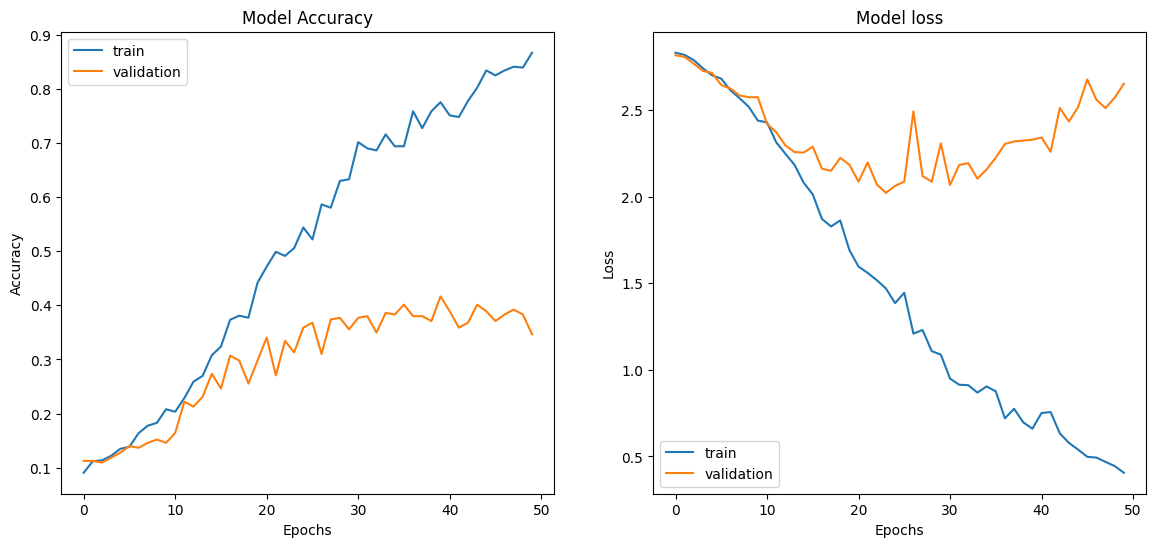

In [13]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()

plt.subplot(1,2,2)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.plot(history.history['loss'], label="train")
plt.plot(history.history['val_loss'], label="validation")
plt.legend()

In [14]:
model.save("model_122k")

INFO:tensorflow:Assets written to: model_122k/assets


INFO:tensorflow:Assets written to: model_122k/assets


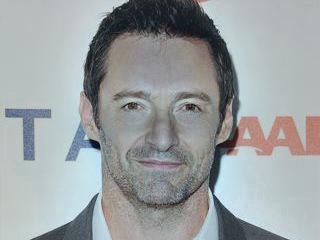

In [19]:
keras.utils.array_to_img(validation_data[0])

In [15]:
img_axis = validation_data[0][None,:,:,:]
img_axis.shape

(1, 240, 320, 3)

In [35]:
pred = model.predict(img_axis)
with np.printoptions(precision=2, suppress=True):
    print(pred)
le.inverse_transform([np.argmax(pred)])

1/1 [==============================] - 0s 21ms/step
[[0.   0.12 0.   0.48 0.   0.   0.   0.31 0.   0.   0.   0.01 0.   0.
  0.   0.08 0.  ]]


array(['Hugh Jackman'], dtype='<U18')

In [21]:
model_45k = keras.models.Sequential([
    keras.layers.Input(shape=train_data.shape[1:]),
    keras.layers.MaxPool2D((2,2), input_shape=train_data.shape[1:]),
    keras.layers.Dropout(0.5),
    keras.layers.Conv2D(16, (3,3), activation="relu"),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(32, (3,3), activation="relu"),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(32, (3,3), activation="relu"),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(32, (3,3), activation="relu"),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(classes, activation="softmax")
    ])

model_45k.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model_45k.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 max_pooling2d_6 (MaxPooling  (None, 120, 160, 3)      0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 120, 160, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 118, 158, 16)      448       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 59, 79, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 57, 77, 32)        4640      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 28, 38, 32)      

In [22]:
history_45k = model_45k.fit(train_data, train_labels, validation_data=(validation_data, validation_labels), batch_size=32, epochs=50)#, callbacks=[callback])

2022-11-30 21:18:56.633627: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1210060800 exceeds 10% of free system memory.


Epoch 1/50


2022-11-30 21:19:28.682228: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_2/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


42/42 [==============================] - 14s 292ms/step - loss: 2.7923 - accuracy: 0.1196 - val_loss: 2.7265 - val_accuracy: 0.1550
Epoch 2/50
42/42 [==============================] - 3s 61ms/step - loss: 2.5779 - accuracy: 0.1691 - val_loss: 2.5893 - val_accuracy: 0.1854
Epoch 3/50
42/42 [==============================] - 3s 71ms/step - loss: 2.3500 - accuracy: 0.2589 - val_loss: 2.4388 - val_accuracy: 0.2249
Epoch 4/50
42/42 [==============================] - 4s 88ms/step - loss: 2.1039 - accuracy: 0.3214 - val_loss: 2.4495 - val_accuracy: 0.1915
Epoch 5/50
42/42 [==============================] - 2s 51ms/step - loss: 1.9428 - accuracy: 0.3968 - val_loss: 2.3782 - val_accuracy: 0.2584
Epoch 6/50
42/42 [==============================] - 3s 79ms/step - loss: 1.6608 - accuracy: 0.4829 - val_loss: 2.3112 - val_accuracy: 0.2857
Epoch 7/50
42/42 [==============================] - 2s 41ms/step - loss: 1.3533 - accuracy: 0.5727 - val_loss: 2.3083 - val_accuracy: 0.2644
Epoch 8/50
42/42 [====

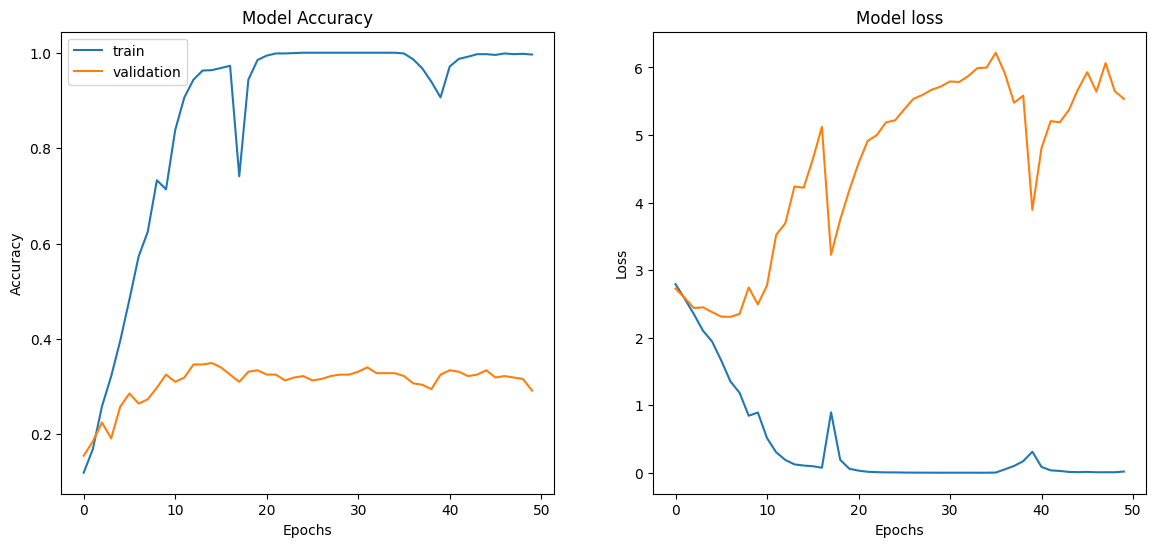

In [23]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history_45k.history['accuracy'], label='train')
plt.plot(history_45k.history['val_accuracy'], label='validation')
plt.legend()

plt.subplot(1,2,2)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.plot(history_45k.history['loss'], label="train")
plt.plot(history_45k.history['val_loss'], label="validation")

In [24]:
model_45k.save("model_45k")

INFO:tensorflow:Assets written to: model_45k/assets


INFO:tensorflow:Assets written to: model_45k/assets
